<a href="https://colab.research.google.com/github/inoyamanaka/Pemrosesan_Text/blob/main/Tugas_Kelompok_Pemrosesan_Teks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A. Mengimport Library

In [35]:
#install Sastrawi
!pip install pysastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import pandas as pd
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [37]:
df = pd.read_excel("Sentiment_analysis.xlsx")
df

,Screen Name,Text,Replies,Retweets,Sentiment
0,NKRI_NTBSasambo,RT @keuangannews_id: Budayawan Muhammadiyah: U...,1.0,1095.0,Negatif
1,Ramahadiput,@yoeherland12 @Rigorsamsa @Ustadz_Ahong Maaf n...,0.0,0.0,Netral
2,j4cky_josu,RT @coachaddie_off: Ukhty @puanmaharani_ri men...,1.0,256.0,Negatif
3,joe_sinatryne,RT @Zombie_9Q: 1/ Harus diingat nama partai b...,2.0,170.0,Netral
4,OryzaSalim,@berrypropan @Julidzone @cybsquad_ @MegaPKelid...,0.0,0.0,Positif
...,...,...,...,...,...
1457,muhamaddaudabd3,@MegaPKeliduan @arvindonoviar HANCURKAN AKUN P...,0.0,0.0,Negatif
1458,1piecekpntamat,@andalasfess hubungan LGBT dengan bencana alam...,0.0,0.0,Negatif
1459,ahablackz,@RidNgemil kayaknya orang yg nyuruh hormati LG...,0.0,0.0,Negatif
1460,akledensah,@bernalacin35 Ahlaksizliga sapikliga lgbt ye H...,1.0,0.0,Negatif


## B. Preprocessing

In [38]:
# kamus normalisasi
norm = {'pgn':'ingin', 'bp':'bapak', 'dg':'dengan', 'gnt':'ganti', 'kmarin':'kemarin', 
        'yg':'yang', 'koq':'kok', 'mrk':'mereka', 'trus':'terus', 'ttg':'tentang', 'tdk':'tidak', 'hrs':'harus', 'jd':'jadi', 
        'atw':'atau', 'sbg':'sebagai', 'tsb':'tersebut', 'bwh':'bawah', 'bkn':'bukan', 'ttp':'tetap', 'blm':'belum', 'pnya':'punya',
        'udh':'udah', 'skrg':'sekarang', 'jg':'juga', 'dlu':'dulu', 'sdh':'sudah', 'klo':'kalau'}

# daftar kata yang dihapus
hapus = ["b'RT", "b RT", "a\\", '\\n', "b'", 'RT']

# kamus stopword
stop_factory = StopWordRemoverFactory()
stop_remover = stop_factory.create_stop_word_remover()

#stopword tambahan
stopwords_custom = ['gak','kadang']
stopwords = StopWordRemoverFactory().get_stop_words()
new_stopwords = stopwords + stopwords_custom
new_array = ArrayDictionary(new_stopwords)
stopwords_remover_new = StopWordRemover(new_array)

# stemmer
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

def preprocess(str_text):
  # 1. Hapus hashtag (#..) - menggunakan regular expression
  str_text = re.sub(r'#[\w]+',' ',str_text)
  # 2. Menghapus kata-kata tertentu (sesuai konteks)
  for a in hapus:
    str_text = str_text.replace(a, "")
  # 3. Hapus URL xf\
  str_text = re.sub(r'xf\S+',' ',str_text)
  # 4. Hapus URL xc\
  str_text = re.sub(r'xc\S+',' ',str_text)
  # 5. Hapus URL xe\
  str_text = re.sub(r'xe\S+',' ',str_text)
  # 6. Hapus URL http\
  str_text = re.sub(r'http\S+',' ',str_text)
  # 7. Hapus mention (b'@..) - menggunakan regular expression
  str_text = re.sub(r"b'@[\w]+",' ',str_text)
  # 8. Hapus mention (@..) - menggunakan regular expression
  str_text = re.sub(r"@[\w]+",' ',str_text)
  # 9. Hapus non-printable chars, tanda baca, angka (alias hapus selain huruf)
  str_text = re.sub(r'[^a-zA-Z]+',' ',str_text)
  # 10. Casefolding - mengubah ke case yang sama semua (misal huruf kecil semua)
  str_text = str_text.lower()
  # 11. Normalisasi kata (membuat penulisan menjadi standar)
  # ----- caranya menggunakan kamus normalisasi yang sudah dibuat
  for a in norm:
    str_text = str_text.replace(a,norm[a])
  # 12. Menghapus Stopwords
  str_text = stopwords_remover_new.remove(str_text)
  # # 13. stemming
  str_text = stemmer.stem(str_text)
  return str_text

df['Text_clean'] = df['Text'].apply(lambda x: preprocess(x))
#tampil tabel
df

,Screen Name,Text,Replies,Retweets,Sentiment,Text_clean
0,NKRI_NTBSasambo,RT @keuangannews_id: Budayawan Muhammadiyah: U...,1.0,1095.0,Negatif,budayawan muhammadiyah umat islam wajib lawan ...
1,Ramahadiput,@yoeherland12 @Rigorsamsa @Ustadz_Ahong Maaf n...,0.0,0.0,Netral,maaf nih teman lgbt udah nasehat mempan jauh b...
2,j4cky_josu,RT @coachaddie_off: Ukhty @puanmaharani_ri men...,1.0,256.0,Negatif,ukhty mati cair cuan komunitas lgbt dar nanya
3,joe_sinatryne,RT @Zombie_9Q: 1/ Harus diingat nama partai b...,2.0,170.0,Netral,nama partai nama partai rakyat
4,OryzaSalim,@berrypropan @Julidzone @cybsquad_ @MegaPKelid...,0.0,0.0,Positif,partai bela lgbt catat om
...,...,...,...,...,...,...
1457,muhamaddaudabd3,@MegaPKeliduan @arvindonoviar HANCURKAN AKUN P...,0.0,0.0,Negatif,hancur akun dukung lgbt ras pei rusak moral an...
1458,1piecekpntamat,@andalasfess hubungan LGBT dengan bencana alam...,0.0,0.0,Negatif,hubung lgbt bencana alam dunia indonesia
1459,ahablackz,@RidNgemil kayaknya orang yg nyuruh hormati LG...,0.0,0.0,Negatif,kayak nyuruh hormat lgbt udah tular
1460,akledensah,@bernalacin35 Ahlaksizliga sapikliga lgbt ye H...,1.0,0.0,Negatif,ahlaksizliga sapikliga lgbt ye hayirrrrrr


In [39]:
# Tampilkan kolom yang akan digunakan untuk klasifikasi
df = df[["Text_clean", "Sentiment"]]
df

,Text_clean,Sentiment
0,budayawan muhammadiyah umat islam wajib lawan ...,Negatif
1,maaf nih teman lgbt udah nasehat mempan jauh b...,Netral
2,ukhty mati cair cuan komunitas lgbt dar nanya,Negatif
3,nama partai nama partai rakyat,Netral
4,partai bela lgbt catat om,Positif
...,...,...
1457,hancur akun dukung lgbt ras pei rusak moral an...,Negatif
1458,hubung lgbt bencana alam dunia indonesia,Negatif
1459,kayak nyuruh hormat lgbt udah tular,Negatif
1460,ahlaksizliga sapikliga lgbt ye hayirrrrrr,Negatif


## C. Split Data Training dan Data Testing


In [40]:
from sklearn.model_selection import train_test_split

feature = df['Text_clean']
target = df['Sentiment']

x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.3,random_state=123)

## D. Training Data

### D.1 Vektorisasi


In [41]:
# Menggunakan TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vec_model_tfidf = TfidfVectorizer().fit(x_train)
vec_data_1 = vec_model_tfidf.transform(x_train)

### D.2 Klasifikasi

In [63]:
# Menggunkan LogisticRegression
from sklearn.linear_model import LogisticRegression
cls_model_lg = LogisticRegression().fit(vec_data_1,y_train)
score1 = cls_model_lg.score(vec_data_1,y_train)

In [64]:
# Menggunkan DecisionTree
from sklearn import tree
cls_model_tree = tree.DecisionTreeClassifier().fit(vec_data_1,y_train)
score2 = cls_model_tree.score(vec_data_1,y_train)

In [68]:
# Menggunakan NeuralNetwork
from sklearn.neural_network import MLPClassifier
cls_model_net = MLPClassifier().fit(vec_data_1,y_train)
score3 = cls_model_tree.score(vec_data_1,y_train)

## E. Testing

### E.1 Vektorisasi

In [65]:
test_data = vec_model_tfidf.transform(x_test)

### E.2 Klasifikasi

In [69]:
# Linear Regression
data = {'Score':[score1, score2, score3]}  
df_score = pd.DataFrame(data, index =['Linear Regression', 'Decision Tree','Neural Network'])  
df_score

,Score
Linear Regression,0.758553
Decision Tree,0.998045
Neural Network,0.998045


### E.3 Confusion Matrix

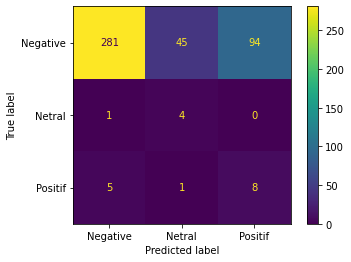

In [58]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

pred = cls_model_lg.predict(test_data)
cm = confusion_matrix(pred,y_test)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Netral','Positif']).plot()

In [72]:
teks = ["Saya menolak LGBT!!!!","DUkung LGBT"]

# preprocessing
teks_clean = [preproses(a) for a in teks]

# vektorisasi
teks_vec = vec_model_tfidf.transform(teks_clean)

# prediksi/klasifikasi
teks_pred_lg = cls_model_lg.predict(teks_vec)
teks_pred_tree = cls_model_tree.predict(teks_vec)
teks_pred_net = cls_model_net.predict(teks_vec)


print("Menggunakan LogisticReggression")
# hasil prediksi
for idx,i in enumerate(teks_pred_lg):
  print("Sentimen kalimat ke " + str(idx) + " adalah " + i)

print("\nMenggunakan Decision Tree")
# hasil prediksi
for idx,i in enumerate(teks_pred_tree):
  print("Sentimen kalimat ke " + str(idx) + " adalah " + i)

print("\nMenggunakan Neural Networks")
# hasil prediksi
for idx,i in enumerate(teks_pred_net):
  print("Sentimen kalimat ke " + str(idx) + " adalah " + i)

Menggunakan LogisticReggression
Sentimen kalimat ke 0 adalah Negatif
Sentimen kalimat ke 1 adalah Negatif

Menggunakan Decision Tree
Sentimen kalimat ke 0 adalah Negatif
Sentimen kalimat ke 1 adalah Negatif

Menggunakan Neural Networks
Sentimen kalimat ke 0 adalah Negatif
Sentimen kalimat ke 1 adalah Negatif
